In [1]:
import urllib, pandas, numpy

In [2]:
# pip install git+https://github.com/Maayanlab/maayanlab-bioinformatics.git
import maayanlab_bioinformatics, maayanlab_bioinformatics.enrichment

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

In [4]:
enrichr_library = 'ENCODE_and_ChEA_Consensus_TFs_from_ChIP-X'

In [5]:
inputfile = '/Users/adrian/hub/vigur/003.proteomics/colored_proteins_24.tsv'
df = pandas.read_csv(inputfile, sep='\t')
df.head()

,Uniprot_ID,Uniprot_gene_ID,Gene_name,ENSEMBL,Description,Color_in_plot,log2FC,Adjusted_P_value
0,P30520,PURA2_HUMAN,ADSS2,ENSG00000035687,Adenylosuccinate synthetase isozyme 2,blue,-0.362995,0.022183
1,B7ZBQ3,B7ZBQ3_HUMAN,MED20,ENSG00000124641,Mediator of RNA polymerase II transcription su...,blue,-0.506240,0.045739
2,Q9BYC9,RM20_HUMAN,MRPL20,ENSG00000242485,"39S ribosomal protein L20, mitochondrial",blue,-0.496515,0.003015
3,Q9Y6D5,BIG2_HUMAN,ARFGEF2,ENSG00000124198,Brefeldin A-inhibited guanine nucleotide-excha...,orange,0.183811,0.046504
4,O95218,ZRAB2_HUMAN,ZRANB2,ENSG00000132485,Zinc finger Ran-binding domain-containing prot...,blue,-0.554378,0.043149


In [6]:
sub = df[(df['Color_in_plot'] == 'blue') | (df['Color_in_plot'] == 'red')] # get blue or red. Another notebook for 4 hours.
v = list(sub['Gene_name'].dropna())
genes = list(set(v))
gene_list = [x.strip() for x in genes]
print(len(gene_list))

1644


In [7]:
def get_library(lib_name):
    '''
    Returns a dictionary mapping each term from the input library to 
    its associated geneset. 
    '''
    raw_lib_data = []

    with urllib.request.urlopen('https://maayanlab.cloud/Enrichr/geneSetLibrary?mode=text&libraryName=' + lib_name) as f:
        for line in f.readlines():
            raw_lib_data.append(line.decode("utf-8").split("\t\t"))

    name = []
    gene_list = []
    lib_data = {}

    for i in range(len(raw_lib_data)):
        name += [raw_lib_data[i][0]]
        raw_genes = raw_lib_data[i][1].replace('\t', ' ')
        gene_list += [raw_genes[:-1]]
    
    lib_data = {a[0]:a[1].split(' ') for a in zip(name, gene_list)}
    return lib_data

lib_data = get_library(enrichr_library) # lib_data contains the background
enrich_results = maayanlab_bioinformatics.enrichment.enrich_crisp(genes, lib_data, 21000, True)

res_df = pandas.DataFrame(
    [ [
        term, 
        res.pvalue, 
        res.odds_ratio,
        res.n_overlap,

    ] for (term, res) in enrich_results ], 
    columns=['term', 'pvalue', 'odds_ratio', 'n_overlap']
)
res_df


,term,pvalue,odds_ratio,n_overlap
0,NANOG CHEA,6.840861e-04,1.565255,69
1,AR CHEA,9.007088e-02,1.166035,98
2,ETS1 ENCODE,8.490518e-05,2.469445,27
3,ZC3H11A ENCODE,4.400033e-01,1.088922,11
4,E2F6 ENCODE,6.816054e-21,1.817173,393
...,...,...,...,...
99,BHLHE40 ENCODE,1.094471e-06,2.194423,54
100,EZH2 CHEA,9.999999e-01,0.098681,2
101,KAT2A ENCODE,3.578471e-07,4.024604,23
102,UBTF ENCODE,5.989707e-15,1.904735,215


(71, 4)
(33, 4)
1	80.04840199843422	TAF1 ENCODE
2	57.374584057354056	MAX ENCODE
3	51.60038992918191	MYC ENCODE
4	47.23273134112063	YY1 ENCODE
5	40.80163385537369	BRCA1 ENCODE
6	38.971240846241066	ATF2 ENCODE
7	31.262152492634087	NFYB ENCODE
8	31.041851100629003	MYC CHEA
9	28.375953871102414	PML ENCODE
10	26.943566985458805	USF2 ENCODE
11	25.70732107395978	USF1 ENCODE
12	23.904635578055167	GABPA ENCODE
13	21.07748667117422	E2F1 CHEA
14	20.102163182151642	CREB1 CHEA
15	19.57487376264274	NRF1 ENCODE
16	18.670466218146164	SIN3A ENCODE
17	17.276500119919728	ZMIZ1 ENCODE
18	16.54244129174399	CHD1 ENCODE
19	13.5373873709087	SPI1 CHEA
20	12.645313732119362	TCF3 ENCODE
21	11.648398349264808	ZNF384 ENCODE
22	10.911982005174941	FLI1 ENCODE
23	10.310481777425036	RCOR1 ENCODE
24	9.853022372023686	YY1 CHEA
25	7.599490045922515	KAT2A ENCODE
26	6.704287535669401	IRF1 ENCODE
27	6.519784989561533	NELFE ENCODE
28	6.351895381940682	BHLHE40 ENCODE
29	5.723695511233273	PPARD CHEA
30	4.928539379155832	NFIC E

/var/folders/j2/645ctp717nv8rwbn2dsccyxh0000gn/T/ipykernel_15100/737665204.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b.loc[:, 'importance'] = importance


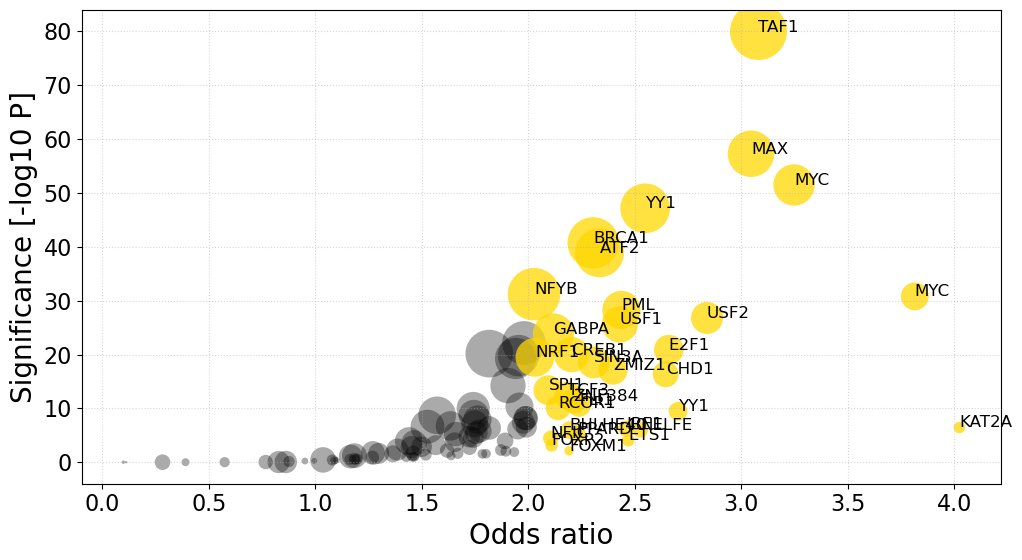

In [8]:
a = res_df[(res_df['pvalue'] > 0.05) | (res_df['odds_ratio'] < 2)]
print(a.shape)
x = a['odds_ratio']
y = -numpy.log10(a['pvalue'])
s = a['n_overlap']
matplotlib.pyplot.scatter(x, y, s*3, alpha=1/3, edgecolors='none', color='black')

b = res_df[(res_df['pvalue'] < 0.05) & (res_df['odds_ratio'] > 2)]
print(b.shape)
x = b['odds_ratio']
y = -numpy.log10(b['pvalue'])
s = b['n_overlap']
sc = matplotlib.pyplot.scatter(x, y, s*3, alpha=3/4, edgecolors='none', color='gold')

x = list(b['odds_ratio'])
y = list(-numpy.log10(b['pvalue']))
importance = [numpy.sqrt(x[i]**2 + y[i]**2) for i in range(len(x))]
b.loc[:, 'importance'] = importance
c = b.sort_values('importance', ascending=False)

threshold = 0 # seven
com = c[c['importance'] > threshold]
count = 0
for index, row in com.iterrows():
    x = row['odds_ratio']
    y = -numpy.log10(row['pvalue'])
    label = row['term'].split()[0]
    matplotlib.pyplot.text(x, y, label, fontsize=12)
    count = count + 1
    print('{}\t{}\t{}'.format(count, row['importance'], row['term']))

#matplotlib.pyplot.legend(*sc.legend_elements("sizes", num=4))
#matplotlib.pyplot.xlim(0, 17)
matplotlib.pyplot.xlabel('Odds ratio')
matplotlib.pyplot.ylabel('Significance [-log10 P]')
matplotlib.pyplot.grid(ls=':', alpha=0.5)
matplotlib.pyplot.tight_layout()

matplotlib.pyplot.show()


In [9]:
lib_data

{'NANOG CHEA': ['RBFOX2',
  'HEXIM1',
  'WSB2',
  'CACNA2D1',
  'MCTS1',
  'RFX4',
  'RFX1',
  'FRS2',
  'LNPEP',
  'DKK1',
  'ATG14',
  'SCD',
  'WDR82',
  'KIAA0247',
  'MTHFD1',
  'VIM',
  'C2ORF88',
  'LEF1',
  'MAP10',
  'RB1',
  'C9ORF50',
  'ANKLE2',
  'HOXB1',
  'CLPB',
  'SGMS1',
  'TESK2',
  'NOLC1',
  'RAX',
  'FZD10',
  'SLC5A1',
  'DLL1',
  'FLRT3',
  'ZSCAN10',
  'LURAP1L',
  'CHST10',
  'DPYSL4',
  'PRSS8',
  'NKX2-2',
  'HOXA1',
  'ZNF148',
  'MS4A10',
  'FZD2',
  'PHC1',
  'PRR11',
  'SRMS',
  'FZD8',
  'SECISBP2',
  'NR0B1',
  'COQ10A',
  'MOV10',
  'VANGL1',
  'GJB3',
  'PLSCR1',
  'GJB5',
  'PKIA',
  'F13B',
  'NANOG',
  'SNAI1',
  'PRR13',
  'SET',
  'CDCA3',
  'PDGFC',
  'NR2E1',
  'ENO1',
  'PDGFA',
  'F11R',
  'SLC6A1',
  'GATA3',
  'LRPAP1',
  'ADH7',
  'RBPJ',
  'SPIC',
  'NTMT1',
  'GJA1',
  'KCNMB2',
  'FIGNL1',
  'IL20RA',
  'LIPH',
  'CCRN4L',
  'HESX1',
  'MYBL2',
  'TMEM8A',
  'NKX3-2',
  'FGFBP1',
  'DUSP6',
  'LRRC28',
  'NDC1',
  'PTCH1',
  'PAX6',
  